**Predicting Customer Behaviour :**

**Import required packages :**

In [1]:
library(rpart)
library(rpart.plot)
library(dplyr)
library(tidyverse)
library(caret)
library(ggplot2)
theme_set(theme_bw())
require(tigerstats)
library(corrplot)
library(DataExplorer)
require(caTools)
library(plyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ stringr 1.4.0
✔ tidyr   1.1.3     ✔ forcats 0.5.0
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Loading required package: tigerstats

Loading required package: abd

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


Loading required package: grid


**Import the dataset (Customer_Behaviour) :**

In [2]:
data <- read.csv(file ="../input/customer-behaviour/Customer_Behaviour.csv") 

**Dimentions of dataset :**

In [3]:
dim(data)

[1] 400   5

**Quick glance at the data :**

In [4]:
str(data)
head(data)

'data.frame':	400 obs. of  5 variables:
 $ User.ID        : int  15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829 15600575 15727311 ...
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 2 1 1 2 1 ...
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


,User.ID,Gender,Age,EstimatedSalary,Purchased
,<int>,<fct>,<int>,<int>,<int>
1,15624510,Male,19,19000,0
2,15810944,Male,35,20000,0
3,15668575,Female,26,43000,0
4,15603246,Female,27,57000,0
5,15804002,Male,19,76000,0
6,15728773,Male,27,58000,0


**Checking for missing values :**

In [5]:
sum(is.na(data))

[1] 0

**INFERENCE :** No (NA/NULL)values in our dataset.

**Transforming Male & Female values to 0 and 1 :**

In [6]:
data$Gender <- revalue(data$Gender, c("Female"=1))
data$Gender <- revalue(data$Gender, c("Male"=0))
head(data$Gender)

[1] 0 0 1 1 0 0
Levels: 1 0

**Converting char to numeric :**

In [7]:
data$Gender = as.numeric(data$Gender)

In [8]:
glimpse(data)

Rows: 400
Columns: 5
$ User.ID         <int> 15624510, 15810944, 15668575, 15603246, 15804002, 1572…
$ Gender          <dbl> 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, …
$ Age             <int> 19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 32…
$ EstimatedSalary <int> 19000, 20000, 43000, 57000, 76000, 58000, 84000, 15000…
$ Purchased       <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, …


**Choosing dependent(Y) and independent(X) variables :**

In [9]:
correlation <- cor(x=data[,(2:5)], method = "pearson")
correlation

,Gender,Age,EstimatedSalary,Purchased
Gender,1.00000000,-0.07374133,-0.06043469,-0.04246946
Age,-0.07374133,1.00000000,0.15523802,0.62245420
EstimatedSalary,-0.06043469,0.15523802,1.00000000,0.36208303
Purchased,-0.04246946,0.62245420,0.36208303,1.00000000


**INFERENCE :** The independent variables(x) are only correlated with the dependent variable(y).Here, we can see that these Age, and EstimatedSalary are highly correlated with sales variable by having these respective R values(0.62245420,0.36208303).


**Split the data into train data and test data :**

In [10]:
set.seed(123)
training.samples <- data$Purchased %>%
 createDataPartition(p = 0.8, list = FALSE)
train.data <- data[training.samples, ]
test.data <- data[-training.samples, ]
head(train.data)

,User.ID,Gender,Age,EstimatedSalary,Purchased
,<int>,<dbl>,<int>,<int>,<int>
2,15810944,2,35,20000,0
4,15603246,1,27,57000,0
5,15804002,2,19,76000,0
7,15598044,1,27,84000,0
8,15694829,1,32,150000,1
9,15600575,2,25,33000,0


**Function prop.table() combined with table() to verify if the randomization process is correct**


In [11]:
prop.table(table(train.data$Purchased))


       0        1 
0.621875 0.378125 

In [12]:
prop.table(table(test.data$Purchased))


    0     1 
0.725 0.275 

**Build the Decision Tree model :**

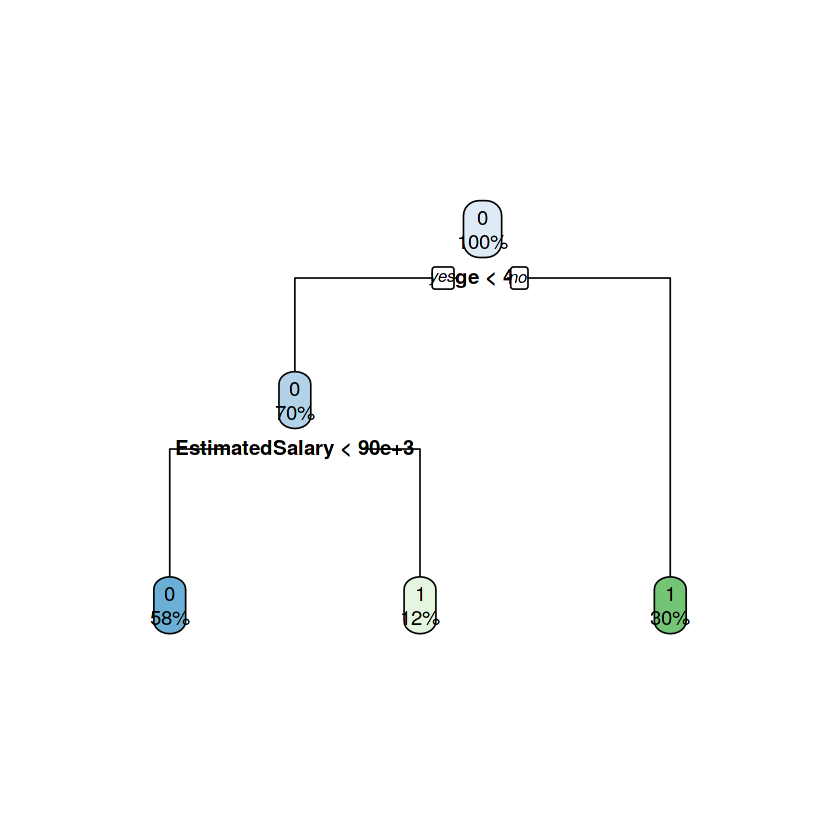

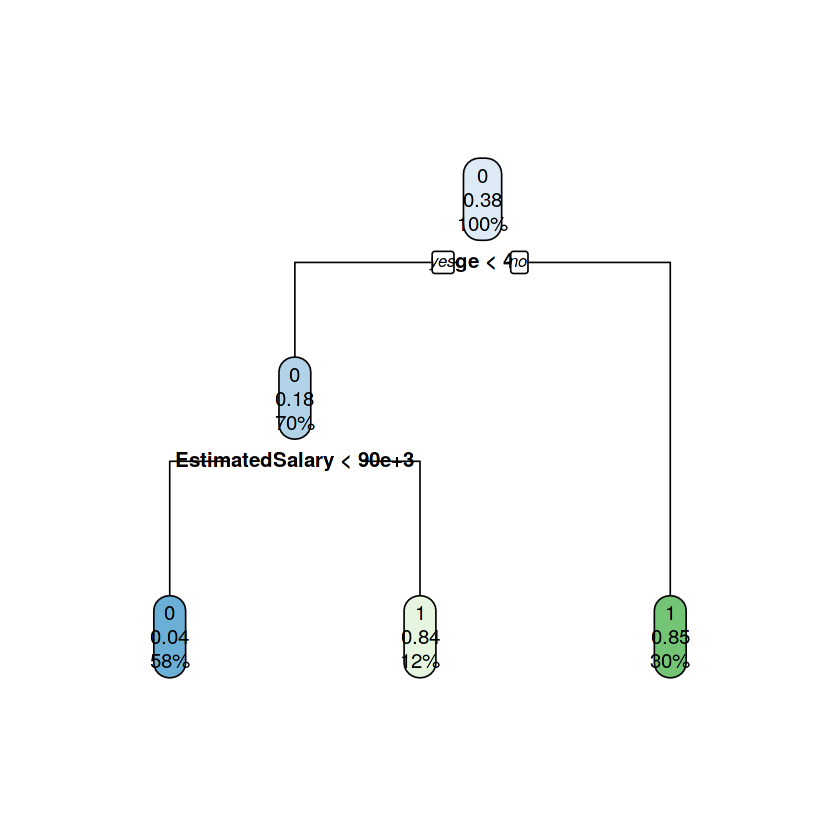

In [13]:
fit <- rpart(Purchased~., data = train.data, method = 'class')
rpart.plot(fit, extra = 100)
rpart.plot(fit)

**Make a prediction :**

**Dimentions of test dataset :**

In [14]:
dim(test.data)

[1] 80  5

**Predicting :**

In [15]:
predict_unseen <-predict(fit, test.data, type = 'class')
table_mat <- table(test.data$Purchased, predict_unseen)
table_mat

   predict_unseen
     0  1
  0 53  5
  1  1 21

**INFERENCE :**
The model correctly predicted 53 not_purchased result but it wrongly classified 5 purchased result. By analogy, the model misclassified only 1 result as purchased while they turned out to be not_purchased.


**Compute the accuracy test from the confusion matrix :**

In [16]:
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
print(paste('Accuracy for testdata', accuracy_Test))

[1] "Accuracy for testdata 0.925"
